# Alpha Hangman

Implementação de um jogador de forca, utilizando o conceito de Entropia para escolher a melhor letra a ser escolhida. O objetivo é que o jogador acerte a palavra com o menor número de tentativas possíveis, com até 5 vidas.

O primeiro passo para a implementação do jogo será a criação de um agente. O agente será responsável por escolher a melhor letra a ser escolhida, baseado nas letras já escolhidas e nas palavras que ainda podem ser a palavra secreta. Para isso, será utilizado o conceito de Entropia, que é uma medida de incerteza de uma variável aleatória. A entropia é dada pela seguinte fórmula:
$$
H(X) = -\sum_{i=1}^{n} p(x_i)log_2p(x_i)
$$
Onde $p(x_i)$ é a probabilidade de ocorrência do evento $x_i$.

Vamos, inicialmente, definir um novo jogo utilizando a classe [JogoDeForca](JogoDeForca.py), obtendo, assim, uma nova palavra, sorteada aleatoriamente a partir de uma lista de palavras.

In [1]:
from JogoDeForca import JogoDeForca

jogo = JogoDeForca()
jogo.novo_jogo()

7

In [2]:
jogo.palavra

'patifes'

In [3]:
tam = len(jogo.palavra)
tam

7

In [4]:
jogo.vidas

5

Acima, temos definidos os parâmetros iniciais do jogo, como a palavra sorteada, número de vidas e quantidade de letras. Em seguida, vamos implementar nosso agente, disponível na classe [Agent](Agent.py). O agente é inicializado com uma lista de letras que não fazem parte da resposta, uma lista com letras que fazem parte da resposta e o tamanho da palavra selecionada.

In [5]:
from Agent import Agent

agent = Agent([], [], tam)

Agora, vamos iniciar o loop principal do jogo. aqui, enquanto o número de vidas for maior que zero, o agente escolherá uma letra, que será inserida na classe do jogo como uma nova tentativa. Após isso, o agente receberá o feedback do jogo, atualizando as listas de letras de sua inicialização. O jogo terminará quando o número de vidas for igual a zero, ou quando o agente tentar uma palavra completa que é igual à palavra definida no jogo.

In [6]:
while jogo.vidas > 0:
    letra = agent.escolher_letra()
    print(f'O agente escolheu a letra {letra}. \n')

    feedback = jogo.tentar_letra(letra)
    print(f'O feedback recebido pelo jogo foi {feedback}. \n')

    agent.receber_feedback(letra, feedback)

    print(f'Lista atualizada de letras que não fazem parte da resposta: {agent.letras_nao}.')
    print(f'Lista atualizada de letras que fazem parte da resposta: {agent.letras_sim}. \n')
    print(f'Palara: \n {agent.palavra}')

    if agent.palavra_completa() == jogo.palavra:
        print('O agente acertou a palavra!')
        break

    print(f'Vidas restantes: {jogo.vidas}. \n')

O agente escolheu a letra a. 

O feedback recebido pelo jogo foi [1]. 

Lista atualizada de letras que não fazem parte da resposta: [].
Lista atualizada de letras que fazem parte da resposta: ['a']. 

Palara: 
 ['_', 'a', '_', '_', '_', '_', '_']
Vidas restantes: 5. 

O agente escolheu a letra s. 

O feedback recebido pelo jogo foi [6]. 

Lista atualizada de letras que não fazem parte da resposta: [].
Lista atualizada de letras que fazem parte da resposta: ['a', 's']. 

Palara: 
 ['_', 'a', '_', '_', '_', '_', 's']
Vidas restantes: 5. 

O agente escolheu a letra e. 

O feedback recebido pelo jogo foi [5]. 

Lista atualizada de letras que não fazem parte da resposta: [].
Lista atualizada de letras que fazem parte da resposta: ['a', 's', 'e']. 

Palara: 
 ['_', 'a', '_', '_', '_', 'e', 's']
Vidas restantes: 5. 

O agente escolheu a letra r. 

O feedback recebido pelo jogo foi []. 

Lista atualizada de letras que não fazem parte da resposta: ['r'].
Lista atualizada de letras que fazem par

### Como o agente escolhe a letra?

O primeiro passo na escolha de letras pelo agente é elaborar uma lista de palavras. Portanto, o agente irá utilizar um arquivo com um grande número de palavras da língua portuguesa, irá lê-lo e salvá-lo em uma lista. Em seguida, o agente irá filtrar essa lista para ficar apenas com palavras que possuem um mesmo tamanho da palavra sorteada.

Após isso, o agente realizará outro filtro, retirando da lista de palavras todas aquelas que possuem letras que não estão presentes na palavra sorteada e, por fim, um último filtro, que deixará a lista apenas com as palavras que possuem letras nas mesmas posições que as já descobertas pelo agente (inicialmente zero).

O próximo passo executado pelo agente é calcular a frequência de letras restantes na lista de palavras. Na jogada inicial, isso é feito com todas as letras presentes, porém conforme o jogo progride o agente irá filtrando cada vez mais. A frequência é calculada da seguinte forma:


```python
frequencia_letras = dict()
for word in word_list:
    for letter in word:
        if letter in frequencia_letras:
            frequencia_letras[letter] += 1
        else:
            frequencia_letras[letter] = 1
```

Com a frequência salva, o agente irá ordenar o dicionário obtido, obtendo, assim, as letras que ocorrem com maior frequência na lista. Essa, portanto, será a próxima letra escolhida pelo agente. Como a letra com mais ocorrências na língua portuguesa é a letra 'a', a primeira letra escolhida pelo agente será sempre essa.

No início do jogo, a entropia do sistema é alta, visto que não há informações sobre a palavra, com exceção de seu tamanho. Assim, à medida que os feedbacks são recebidos, o agente irá atualizar a lista de palavras, reduzindo a sua incerteza sobre a palavra e, portanto, reduzindo a entropia. Portanto, o agente tenta minimizar a entropia escolhendo a letra que aparece com mais frequência na lista de palavras, esperando que tal letra seja a mais provável de estar na palavra desconhecida sorteada. Tal abordagem é conhecida como [Princípio de Máxima Entropia](https://en.wikipedia.org/wiki/Maximum_entropy_probability_distribution).

Seu fundamento básico é de que não sabemos nada sobre o sistema, assumindo que é o mais desordenado possível (no caso, sabemos apenas o tamanho da palavra, inicialmente).Assim, toda as configurações são equiprováveis, até aplicarmos uma série de restrições, no caso representadas pelos filtros, que determinarão um peso para a distribuição de probabilidades.

O agente elaborado possui um segundo método para escolher uma letra, chamado `escolher_letra_entropia`. Nesse método, o agente irá calcular, além da frequência, a entropia das letras presentes na lista de palavras, utilizando a fórmula anteriormente apresentada. Assim, podemos verificar qual é a entropia da letra escolhida pelo agente com base na frequência, comparando-a com a entropia das demais letras.

Para testarmos isso, utilizaremos uma palavra pré-selecionada, evitando a aleatoriedade gerada pela implementação do jogo. Utilizaremos a palavra `hipopotamos` para esse teste.

In [7]:
palavra = 'hipopotamos'
jogo = JogoDeForca(palavra)
jogo.novo_jogo()

11

In [8]:
tamanho = len(jogo.palavra)
agent = Agent([], [], tamanho)

In [9]:
letra = agent.escolher_letra_entropia()

Entropia de cada letra: {'a': 0.40595249269048833, 'e': 0.36777144985342136, 's': 0.35030834268497546, 'r': 0.329458407029869, 'i': 0.30943276881585724, 'o': 0.26871986503414746, 'm': 0.22569753817681396, 'n': 0.20007344372025201, 't': 0.195080995947707, 'c': 0.19066841641152005, 'd': 0.1619321833250531, 'l': 0.1329377224477419, 'u': 0.13122431672408955, 'p': 0.12038083439035369, 'v': 0.10428309454572482, 'g': 0.08290302198499622, 'b': 0.07555957297569942, 'f': 0.07478729930041504, 'h': 0.05520277729236828, 'z': 0.04955706521606116, 'q': 0.03039711491259154, 'j': 0.025698390639855576, 'x': 0.024440288582648725, 'w': 0.00017145824024704926, 'A': 0.00013181668830766356, 'E': 0.00013181668830766356, 'k': 0.00013181668830766356, 'D': 4.804161535271282e-05, 'G': 4.804161535271282e-05, 'M': 4.804161535271282e-05, 'P': 4.804161535271282e-05}


In [10]:
letra

'a'

Como podemos ver, a letra escolhida pelo agente foi a letra 'a' que, entre as palavras filtradas pelo agente, possui a maior frequência e, portanto, a maior probabilidade de estar presente na palavra selecionada. Ademais, podemos verificar a entropia da letra escolhida pelo agente e a entropia das demais letras.

Como pode ser visto, a entropia da letra 'a' é maior que a das demais apresentadas. Nesse caso, com poucas informações, a letra 'a' foi escolhida primeiro e apresenta a maior entropia pois é a mais incerta dentro da lista de palavras; ou seja, a presença de 'a' em uma palavra não irá reduzir significativamente a incerteza sobre a palavra correta, visto que é a letra mais comum. Assim, a letra mais frequente é a que possui a maior entropia.

Vamos, agora, seguir com a execução do jogo. Agora, haverá uma pausa de 5 segundos entre cada jogada, para que possamos acompanhar o jogo, a entropia de cada letra e a escolha do agente.

In [11]:
feedback = jogo.tentar_letra(letra)
agent.receber_feedback(letra, feedback)
print(f'Lista atualizada de letras que não fazem parte da resposta: {agent.letras_nao}.')
print(f'Lista atualizada de letras que fazem parte da resposta: {agent.letras_sim}. \n')
print(f'Palara: \n {agent.palavra}')

Lista atualizada de letras que não fazem parte da resposta: [].
Lista atualizada de letras que fazem parte da resposta: ['a']. 

Palara: 
 ['_', '_', '_', '_', '_', '_', '_', 'a', '_', '_', '_']


In [12]:
import time

while jogo.vidas > 0:
    letra = agent.escolher_letra_entropia()
    print(f'O agente escolheu a letra {letra}. \n')

    time.sleep(5)

    feedback = jogo.tentar_letra(letra)
    agent.receber_feedback(letra, feedback)

    print(f'Palara: \n {agent.palavra}')

    if agent.palavra_completa() == jogo.palavra:
        print('O agente acertou a palavra!')
        break

    print(f'Vidas restantes: {jogo.vidas}. \n')

Entropia de cada letra: {'a': 0.45941693669611056, 'r': 0.3365384751169207, 'e': 0.31617216097848383, 's': 0.3119951714025297, 'o': 0.2816430347488699, 'i': 0.2722015999485077, 'm': 0.24039285478911995, 'n': 0.20166377226501542, 'c': 0.18843934642365673, 't': 0.18779524639284176, 'd': 0.16009019521914694, 'l': 0.13892256523558494, 'v': 0.12998037135919718, 'p': 0.11976294585216389, 'u': 0.11571281988396569, 'g': 0.0847373060848243, 'f': 0.07405727028184829, 'b': 0.07323618578449037, 'h': 0.06318358043207843, 'z': 0.05913145411752006, 'q': 0.0278961395078749, 'j': 0.027102339134841672, 'x': 0.022148888597820996, 'w': 0.00024919974956014515, 'k': 0.00024919974956014515, 'A': 0.000132403230222913}
O agente escolheu a letra r. 

Palara: 
 ['_', '_', '_', '_', '_', '_', '_', 'a', '_', '_', '_']
Vidas restantes: 4. 

Entropia de cada letra: {'a': 0.46105837226478597, 's': 0.36025216900525936, 'e': 0.2941178360595958, 'o': 0.2907560888712897, 'i': 0.27329203262957236, 'n': 0.25156558786929767

Como podemos observar, o agente escolheu a palavra corretamente. Analisando a entropia de cada letra escolhida pelo agente, é possível observar que ele sempre seleciona a letra que apresenta a maior entropia e que ainda não foi testada, provando o que foi dito anteriormente. Assim, o jogador irá sempre selecionar a letra com maior frequência, e que possui uma incerteza maior na lista de palavras, visto que é a letra mais comum e, portanto, não oferece um grande aumento de informação sobre a palavra.

### Testando o jogo em diversas iterações

Em seguida, vamos testar o jogo em diversas iterações para verificar e analisar as situações em que o jogador consegue ou não acertar a palavra. Para isso, vamos iterar 1000 vezes, sempre com uma palavra aleatória selecionada pelo jogo. Não recomendamos que rode essa sessão do Notebook, pois pode demorar e afetar nossas análises devido ao fator de aleatoriedade na escolha das palavras.

In [14]:
perdeu = 0
lista_perdeu = list()

ganhou = 0
lista_ganhou = list()

In [15]:
from tqdm import tqdm

for _ in tqdm(range(1000)):
    jogo = JogoDeForca()
    jogo.novo_jogo()
    tam = len(jogo.palavra)
    agent = Agent([], [], tam)

    while jogo.vidas > 0:
        letra = agent.escolher_letra()
        feedback = jogo.tentar_letra(letra)
        agent.receber_feedback(letra, feedback)
        if agent.palavra_completa() == jogo.palavra:
            break

    if jogo.vidas == 0:
        perdeu += 1
        lista_perdeu.append(jogo.palavra)
    else:
        ganhou += 1
        lista_ganhou.append(jogo.palavra)

print(f'Ganhou: {ganhou}')
print(f'Perdeu: {perdeu}')
print(f'Porcentagem de vitoria: {ganhou/(ganhou+perdeu)}')

  0%|          | 3/1000 [00:02<14:14,  1.17it/s]

Fim de jogo!


  0%|          | 4/1000 [00:03<15:52,  1.05it/s]

Fim de jogo!


  1%|▏         | 14/1000 [00:12<15:44,  1.04it/s]

Fim de jogo!


  3%|▎         | 27/1000 [00:25<15:26,  1.05it/s]

Fim de jogo!


  3%|▎         | 32/1000 [00:30<16:00,  1.01it/s]

Fim de jogo!


  5%|▍         | 48/1000 [00:47<13:21,  1.19it/s]

Fim de jogo!


  5%|▌         | 52/1000 [00:51<15:17,  1.03it/s]

Fim de jogo!


  8%|▊         | 79/1000 [01:17<13:05,  1.17it/s]

Fim de jogo!


  9%|▉         | 90/1000 [01:28<15:27,  1.02s/it]

Fim de jogo!


  9%|▉         | 94/1000 [01:31<14:19,  1.05it/s]

Fim de jogo!


 10%|█         | 105/1000 [01:43<16:10,  1.08s/it]

Fim de jogo!


 11%|█         | 106/1000 [01:44<15:10,  1.02s/it]

Fim de jogo!


 11%|█         | 110/1000 [01:47<13:21,  1.11it/s]

Fim de jogo!


 13%|█▎        | 128/1000 [02:04<12:49,  1.13it/s]

Fim de jogo!


 14%|█▍        | 141/1000 [02:16<12:16,  1.17it/s]

Fim de jogo!


 15%|█▌        | 152/1000 [02:25<12:13,  1.16it/s]

Fim de jogo!


 16%|█▌        | 155/1000 [02:28<12:49,  1.10it/s]

Fim de jogo!


 16%|█▋        | 165/1000 [02:37<13:25,  1.04it/s]

Fim de jogo!


 20%|██        | 202/1000 [03:11<11:04,  1.20it/s]

Fim de jogo!


 22%|██▏       | 216/1000 [03:23<11:36,  1.12it/s]

Fim de jogo!


 23%|██▎       | 229/1000 [03:35<11:32,  1.11it/s]

Fim de jogo!


 23%|██▎       | 231/1000 [03:37<11:44,  1.09it/s]

Fim de jogo!


 29%|██▉       | 290/1000 [04:30<10:40,  1.11it/s]

Fim de jogo!


 30%|███       | 300/1000 [04:40<11:43,  1.00s/it]

Fim de jogo!


 32%|███▏      | 315/1000 [04:54<11:22,  1.00it/s]

Fim de jogo!


 34%|███▍      | 340/1000 [05:17<11:02,  1.00s/it]

Fim de jogo!


 34%|███▍      | 345/1000 [05:22<10:37,  1.03it/s]

Fim de jogo!


 35%|███▌      | 350/1000 [05:28<11:24,  1.05s/it]

Fim de jogo!


 38%|███▊      | 380/1000 [05:56<09:54,  1.04it/s]

Fim de jogo!


 42%|████▏     | 415/1000 [06:36<12:01,  1.23s/it]

Fim de jogo!


 42%|████▏     | 416/1000 [06:37<12:22,  1.27s/it]

Fim de jogo!


 43%|████▎     | 427/1000 [06:47<08:38,  1.11it/s]

Fim de jogo!


 43%|████▎     | 433/1000 [06:53<07:55,  1.19it/s]

Fim de jogo!


 48%|████▊     | 477/1000 [07:34<07:46,  1.12it/s]

Fim de jogo!


 50%|█████     | 504/1000 [08:00<08:20,  1.01s/it]

Fim de jogo!


 51%|█████     | 506/1000 [08:02<07:39,  1.07it/s]

Fim de jogo!


 52%|█████▏    | 518/1000 [08:14<09:05,  1.13s/it]

Fim de jogo!


 55%|█████▌    | 550/1000 [08:45<07:08,  1.05it/s]

Fim de jogo!


 60%|█████▉    | 597/1000 [09:30<06:21,  1.06it/s]

Fim de jogo!


 60%|██████    | 605/1000 [09:38<06:18,  1.04it/s]

Fim de jogo!


 61%|██████    | 609/1000 [09:42<06:44,  1.03s/it]

Fim de jogo!


 63%|██████▎   | 626/1000 [09:57<06:02,  1.03it/s]

Fim de jogo!


 63%|██████▎   | 631/1000 [10:03<07:13,  1.18s/it]

Fim de jogo!


 64%|██████▎   | 637/1000 [10:08<05:43,  1.06it/s]

Fim de jogo!


 64%|██████▍   | 638/1000 [10:09<05:44,  1.05it/s]

Fim de jogo!


 65%|██████▌   | 654/1000 [10:24<04:43,  1.22it/s]

Fim de jogo!


 66%|██████▌   | 662/1000 [10:31<04:52,  1.15it/s]

Fim de jogo!


 66%|██████▋   | 663/1000 [10:32<04:56,  1.14it/s]

Fim de jogo!


 67%|██████▋   | 674/1000 [10:43<05:23,  1.01it/s]

Fim de jogo!


 68%|██████▊   | 684/1000 [10:53<04:47,  1.10it/s]

Fim de jogo!


 69%|██████▉   | 691/1000 [11:00<05:00,  1.03it/s]

Fim de jogo!


 71%|███████   | 712/1000 [11:21<04:39,  1.03it/s]

Fim de jogo!


 75%|███████▍  | 748/1000 [11:54<03:49,  1.10it/s]

Fim de jogo!


 76%|███████▌  | 762/1000 [12:07<03:47,  1.04it/s]

Fim de jogo!


 77%|███████▋  | 769/1000 [12:14<03:54,  1.01s/it]

Fim de jogo!


 78%|███████▊  | 777/1000 [12:21<03:46,  1.02s/it]

Fim de jogo!


 78%|███████▊  | 780/1000 [12:25<03:50,  1.05s/it]

Fim de jogo!


 79%|███████▉  | 793/1000 [12:37<03:19,  1.04it/s]

Fim de jogo!


 83%|████████▎ | 830/1000 [13:15<02:51,  1.01s/it]

Fim de jogo!


 84%|████████▎ | 835/1000 [13:20<02:29,  1.10it/s]

Fim de jogo!


 84%|████████▍ | 843/1000 [13:28<02:42,  1.04s/it]

Fim de jogo!


 94%|█████████▍| 942/1000 [15:01<00:46,  1.24it/s]

Fim de jogo!


 96%|█████████▌| 959/1000 [15:17<00:39,  1.04it/s]

Fim de jogo!


 97%|█████████▋| 973/1000 [15:31<00:26,  1.00it/s]

Fim de jogo!


100%|█████████▉| 998/1000 [15:55<00:02,  1.13s/it]

Fim de jogo!


100%|██████████| 1000/1000 [15:57<00:00,  1.04it/s]

Ganhou: 935
Perdeu: 65
Porcentagem de vitoria: 0.935


In [16]:
lista_perdeu

['topam',
 'ciganas',
 'pedras',
 'tumultues',
 'pomba',
 'repenseis',
 'jota',
 'sazonaria',
 'pequei',
 'secunde',
 'azeitando',
 'capado',
 'sapecado',
 'fretou',
 'defumai',
 'lutarmo',
 'sulcar',
 'empoca',
 'zurre',
 'sufixemo',
 'lei',
 'trepadas',
 'vetado',
 'velhaco',
 'grudavas',
 'matizadas',
 'punhamos',
 'quebravam',
 'esquivas',
 'gumes',
 'pilharmos',
 'cruzai',
 'capua',
 'galgamo',
 'rape',
 'granulos',
 'caguei',
 'palhas',
 'soro',
 'gamo',
 'ganhai',
 'jaguar',
 'vadearmos',
 'fustigava',
 'bitolou',
 'pecavam',
 'logrando',
 'bicas',
 'pulamos',
 'afundam',
 'foquemo',
 'concedi',
 'pipoco',
 'pedir',
 'roubam',
 'segurado',
 'gaiatos',
 'cotejai',
 'torrei',
 'condoam',
 'nutram',
 'fiteis',
 'queixasse',
 'bocejares',
 'chupassem']

In [17]:
lista_ganhou

['tiritareis',
 'atenuaramos',
 'decepavam',
 'seriassem',
 'destrincham',
 'cancelamento',
 'amanteigado',
 'rajara',
 'lacra',
 'radiografarao',
 'ieis',
 'habitavamos',
 'discordamo',
 'arriscamo',
 'barricares',
 'penhoramos',
 'adulteremo',
 'salivarmos',
 'oscilavas',
 'levitasses',
 'cultivam',
 'desvio',
 'liberalizastes',
 'refresquem',
 'ciscaremos',
 'foragireis',
 'pronunciarmo',
 'encerrarei',
 'saturarao',
 'emocionaste',
 'editaveis',
 'arrevesara',
 'desmoralizara',
 'acambarcasses',
 'aleites',
 'irrelevancias',
 'antiquissimas',
 'cressemos',
 'arbitrariedades',
 'concentrai',
 'ajuntastes',
 'mancaram',
 'seguiremo',
 'agruparei',
 'chatear',
 'infracao',
 'pensava',
 'revivesceriam',
 'corrige',
 'deificadas',
 'cosmologica',
 'depositaria',
 'personalizados',
 'haviam',
 'secundario',
 'barganharao',
 'estrondea',
 'jazessem',
 'levitardes',
 'inteprete',
 'preguearao',
 'requentaria',
 'derrubarao',
 'agarrara',
 'auxiliarei',
 'barateasse',
 'executamos',
 'entre

Em seguida, vamos selecionar algumas palavras que o agente não conseguiu acertar para analisarmos a fundo o que aconteceu.

In [22]:
import random

palavra = random.choice(lista_perdeu)
palavra

'secunde'

In [25]:
jogo = JogoDeForca(palavra)
jogo.novo_jogo()
tamanho = len(jogo.palavra)
agent = Agent([], [], tamanho)

In [26]:
while jogo.vidas > 0:
    letra = agent.escolher_letra_entropia()
    print(f'O agente escolheu a letra {letra}. \n')

    time.sleep(5)

    feedback = jogo.tentar_letra(letra)
    agent.receber_feedback(letra, feedback)

    print(f'Palara: \n {agent.palavra}')

    if agent.palavra_completa() == jogo.palavra:
        print('O agente acertou a palavra!')
        break

    print(f'Vidas restantes: {jogo.vidas}. \n')

Entropia de cada letra: {'a': 0.4257100959909657, 'e': 0.3524206061127924, 'i': 0.30359718848007194, 'r': 0.3027917175226779, 'o': 0.2998714502606315, 's': 0.2869887670504709, 'm': 0.2216708823037093, 't': 0.1893493027378077, 'c': 0.18276881353044486, 'u': 0.176170050032678, 'n': 0.1744380521345257, 'd': 0.17274193109877356, 'l': 0.16122826454211278, 'p': 0.12393832391783374, 'v': 0.11648054637292216, 'g': 0.10438453656081646, 'b': 0.09644483236522644, 'f': 0.08815338790552325, 'h': 0.05658086621796429, 'j': 0.04279040084916106, 'x': 0.03682458221321436, 'z': 0.035422688273497156, 'q': 0.023659788567770287, 'A': 0.0027737085869637755, 'E': 0.0020164741543145922, 'B': 0.0014610045085129801, 'S': 0.0012141406345381207, 'R': 0.00104578109985984, 'C': 0.000873753876016159, 'G': 0.0007861211535584729, 'L': 0.0007861211535584729, 'D': 0.0006069038118280573, 'T': 0.0006069038118280573, 'H': 0.0005148967291052727, 'M': 0.0005148967291052727, 'N': 0.00042087002643022785, 'J': 0.0003243089931522

A palavra selecionada, que não foi adivinhada pelo agente, foi 'secunde'. Como é possível avaliar no loop de jogo acima, o agente primeiramente selecionou a letra 'a', que é a mais frequente frente o filtro realizado com o tamanho da palavra. Em seguida, a letra de maior entropia passou a ser 'e', que realmente está presente na palavra. Essas duas primeiras iterações já demonstram o erro gerado. Como o agente seleciona a letra de maior frequência na lista de palavras e, portanto, de maior entropia, ele seleciona a letra 'a', que não está presente, para então selecionar a letra 'e', que de fato está presente. Esse tipo de jogador funciona de maneira ideal quando a palavra selecionada possui letras frequentemente utilizadas juntas no alfabeto. Assim, o agente consegue selecionar a letra correta em poucas iterações.

Nos casos em que o agente perde, as letras presentes na palavra possuem uma entropia baixa, ou seja, geram uma incerteza menor no sistema. Caso chutássemos uma dessas letras, se estivéssemos corretos, obteríamos um grande número de informações sobre a palavra que estamos tentando adivinhar, reduzindo a entropia, porém a probabilidade disso acontecer é baixa. Para o jogador de forca, isso não é algo bom, pois determina que, ao selecionar a letra, haverão poucas opções de palavras que a apresentam. Assim, o agente irá selecionar a letra de maior frequência, que não necessariamente está presente na palavra, e irá perder o jogo.

Note que, caso tenha rodado novamente essa sessão do notebook, a palavra selecionada pode não ser a mesma devido ao fator de aleatoriedade, mas o mesmo princípio se aplica.

Para visualizarmos melhor isso, vamos realizar uma análise visual da frequência de cada letra nas palavras que o agente perdeu e nas palavras que o agente ganhou. Para isso, elaboraremos gráficos com a frequência e a probabilidade de cada letra de forma separada e conjunta.

In [37]:
from collections import Counter

def calcular_frequencia(lista):
    letras = list()
    for palavra in lista:
        for letra in palavra:
            letras.append(letra)
    return Counter(letras)

frequencia_perdeu = calcular_frequencia(lista_perdeu)
frequencia_ganhou = calcular_frequencia(lista_ganhou)

frequencia_perdeu = {k: v for k, v in sorted(frequencia_perdeu.items(), key=lambda item: item[1], reverse=True)}
frequencia_ganhou = {k: v for k, v in sorted(frequencia_ganhou.items(), key=lambda item: item[1], reverse=True)}

In [38]:
frequencia_ganhou

{'a': 1422,
 'e': 1148,
 's': 988,
 'r': 937,
 'i': 839,
 'o': 684,
 'm': 524,
 'n': 416,
 't': 406,
 'c': 391,
 'd': 309,
 'u': 235,
 'l': 226,
 'p': 205,
 'v': 172,
 'b': 122,
 'g': 113,
 'f': 97,
 'z': 76,
 'h': 62,
 'j': 31,
 'x': 31,
 'q': 28,
 'B': 1,
 'G': 1,
 'A': 1,
 'P': 1}

In [39]:
frequencia_perdeu

{'a': 69,
 'o': 39,
 'e': 39,
 's': 33,
 'u': 31,
 'i': 26,
 'r': 26,
 'm': 23,
 'p': 20,
 'c': 19,
 't': 17,
 'd': 17,
 'g': 14,
 'n': 13,
 'l': 12,
 'v': 8,
 'f': 7,
 'b': 6,
 'h': 6,
 'z': 5,
 'q': 5,
 'j': 4,
 'x': 2}

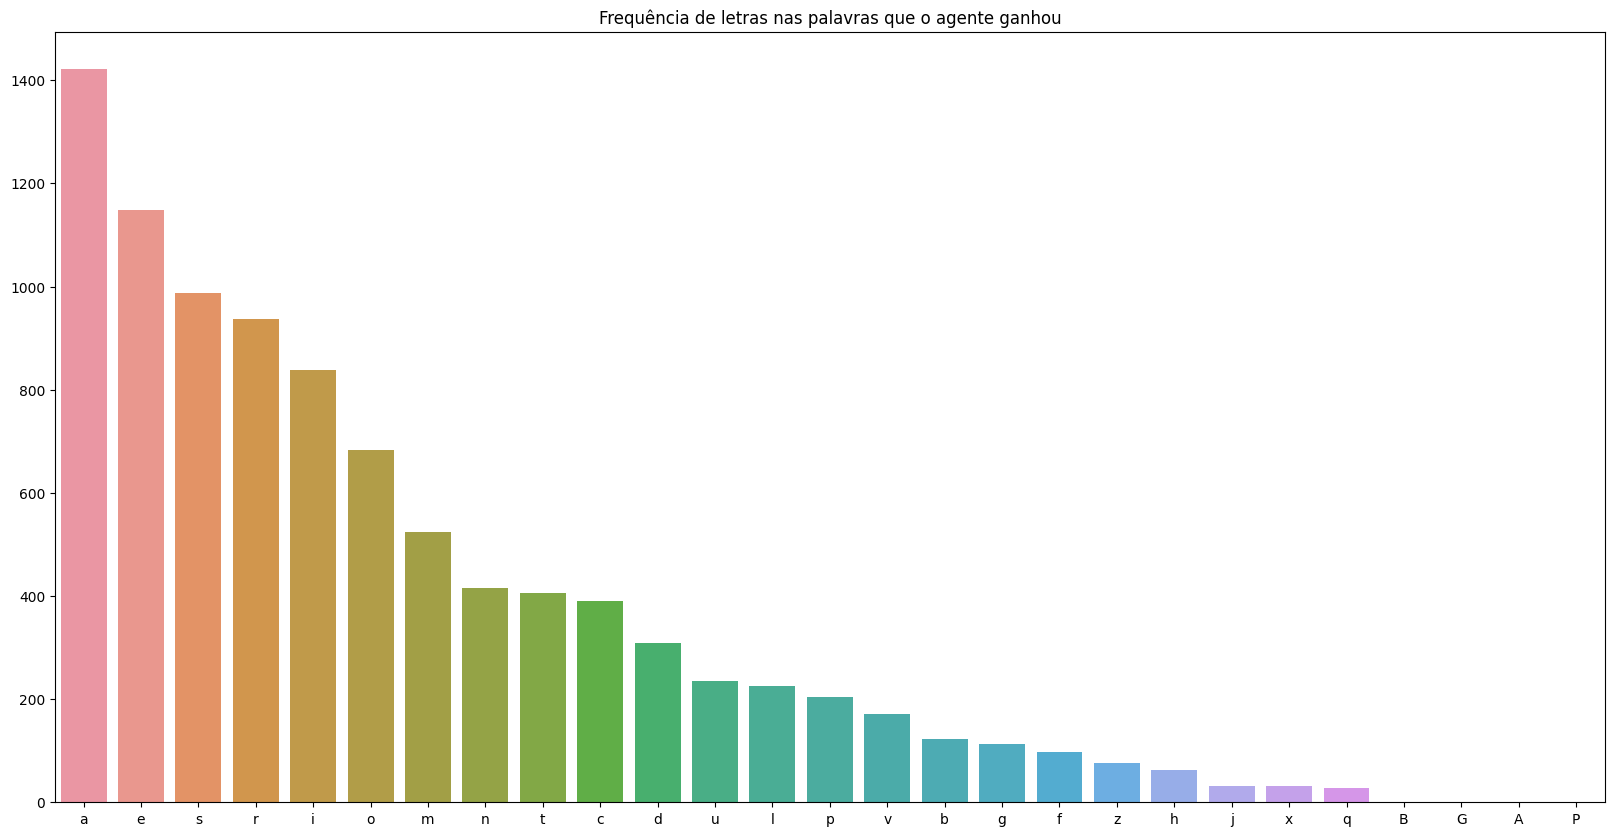

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.barplot(x=list(frequencia_ganhou.keys()), y=list(frequencia_ganhou.values()))
plt.title('Frequência de letras nas palavras que o agente ganhou')
plt.show()

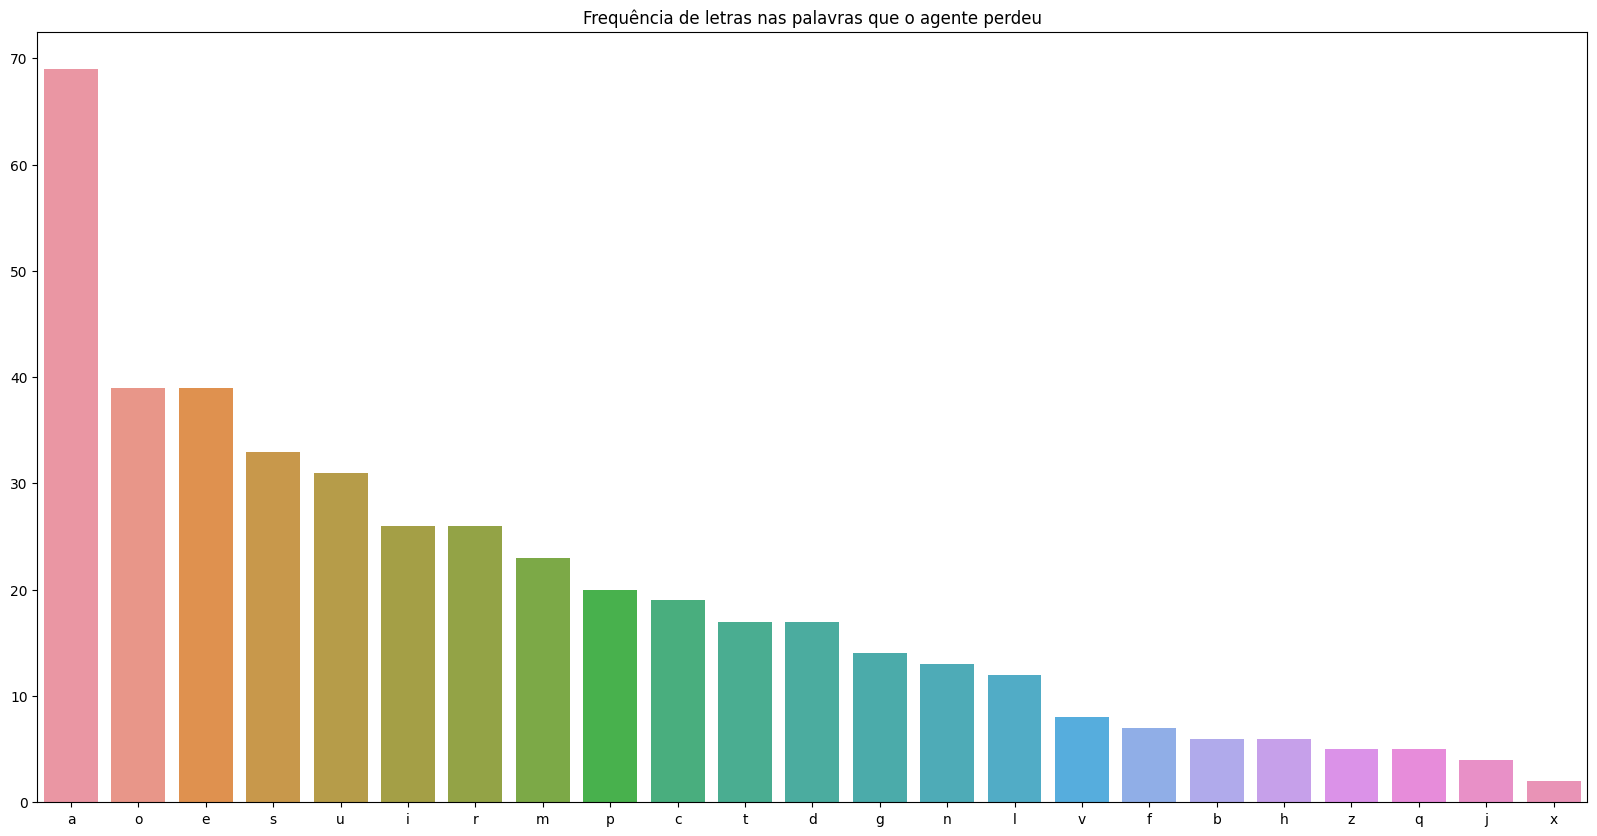

In [41]:
plt.figure(figsize=(20, 10))
sns.barplot(x=list(frequencia_perdeu.keys()), y=list(frequencia_perdeu.values()))
plt.title('Frequência de letras nas palavras que o agente perdeu')
plt.show()

In [42]:
probabilidades_perdeu = dict()
probabilidades_ganhou = dict()

for letra in frequencia_perdeu.keys():
    probabilidades_perdeu[letra] = frequencia_perdeu[letra]/sum(frequencia_perdeu.values())

for letra in frequencia_ganhou.keys():
    probabilidades_ganhou[letra] = frequencia_ganhou[letra]/sum(frequencia_ganhou.values())

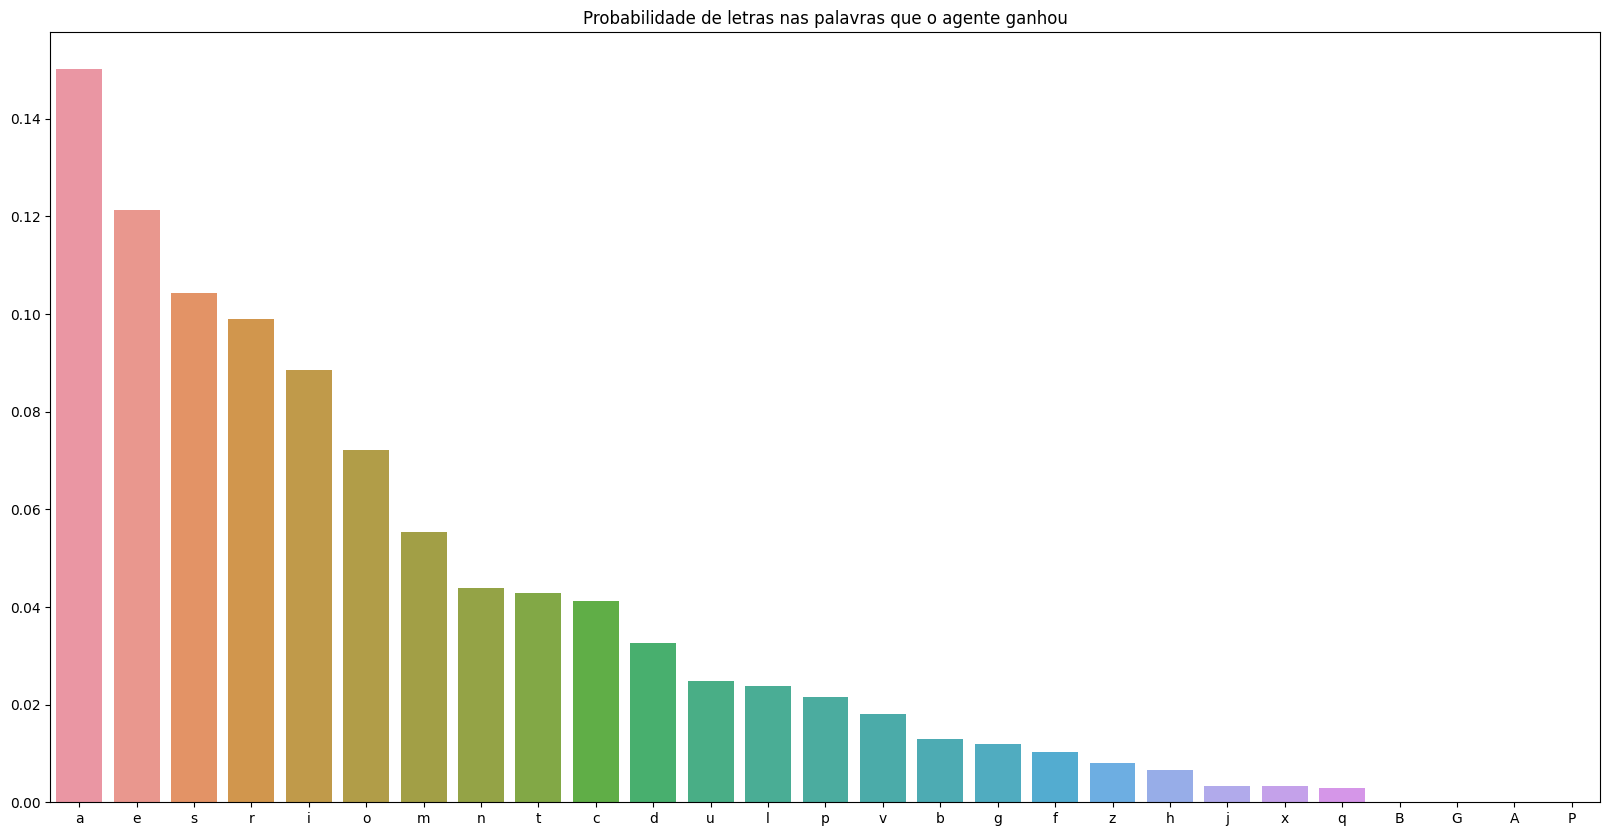

In [43]:
plt.figure(figsize=(20, 10))
sns.barplot(x=list(probabilidades_ganhou.keys()), y=list(probabilidades_ganhou.values()))
plt.title('Probabilidade de letras nas palavras que o agente ganhou')
plt.show()

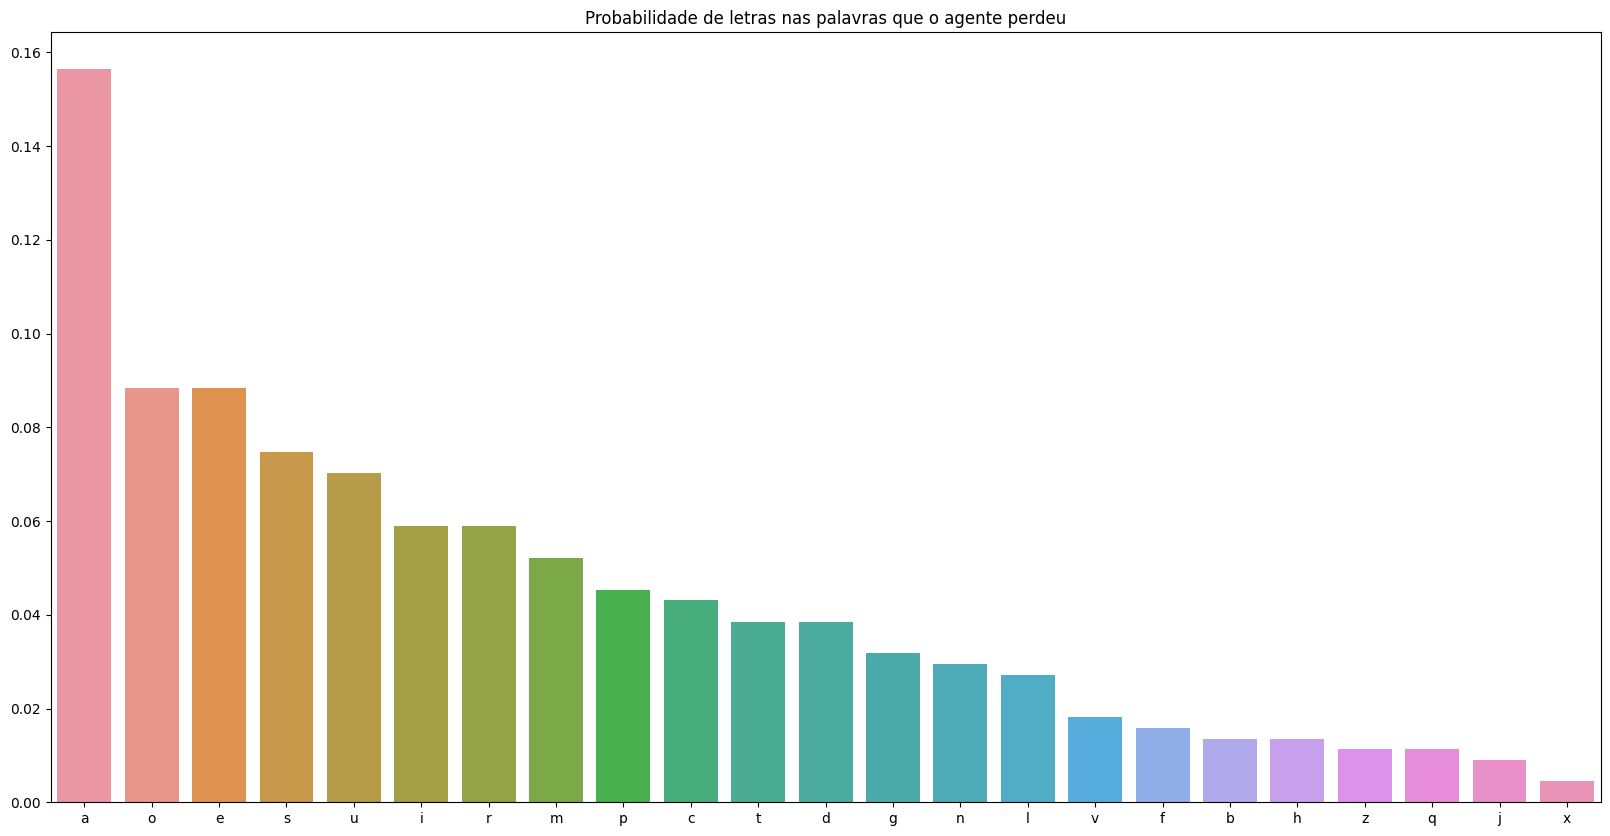

In [44]:
plt.figure(figsize=(20, 10))
sns.barplot(x=list(probabilidades_perdeu.keys()), y=list(probabilidades_perdeu.values()))
plt.title('Probabilidade de letras nas palavras que o agente perdeu')
plt.show()

In [46]:
import pandas as pd

df_ganhou = pd.DataFrame({'letra': list(probabilidades_ganhou.keys()), 'probabilidade': list(probabilidades_ganhou.values()), 'resultado': 'ganhou'})
df_perdeu = pd.DataFrame({'letra': list(probabilidades_perdeu.keys()), 'probabilidade': list(probabilidades_perdeu.values()), 'resultado': 'perdeu'})
df = pd.concat([df_ganhou, df_perdeu])

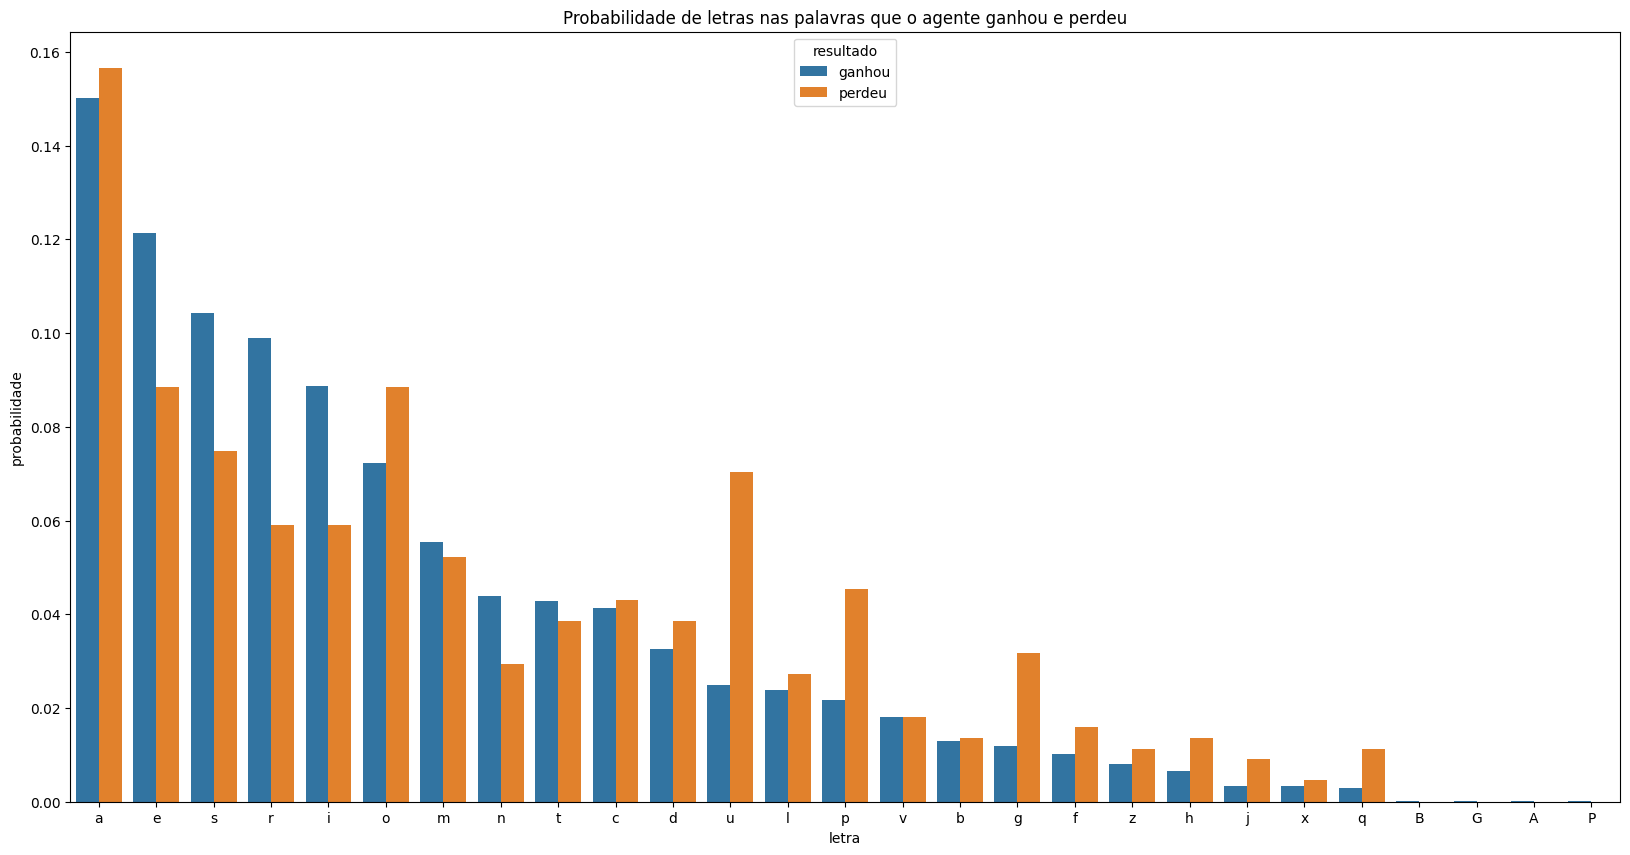

In [47]:
plt.figure(figsize=(20, 10))
sns.barplot(x='letra', y='probabilidade', hue='resultado', data=df)
plt.title('Probabilidade de letras nas palavras que o agente ganhou e perdeu')
plt.show()

Aqui, é possível analisar de forma clara a probabilidade (frequência) de cada letra em ambos os casos. Como é possível observar, apesar de em ambos os casos a letra 'a' ser a mais frequente, há diferenças claras em letras como 'u', 'p', 'o', 'g' e 'q' entre as palavras vencedoras e as perdedoras. Assim, o agente perdeu em palavras que possuíam uma frequência maior dessas letras frente às palavras que ganhou. Isso demonstra que o agente não consegue lidar bem com palavras que possuem letras com frequência baixa no alfabeto, pois ele irá selecionar a letra de maior frequência. Como dito anteriormente, tais letras possuem uma baixa entropia. Portanto, caso um jogador as selecionasse e acertasse, teria uma boa base de informação quanto à palavra que deseja acertar, reduzindo a entropia do sistema. Como a probabilidade de isso ocorrer é baixa, não é uma jogada ótima, o que fica claro ao analisar os resultados do agente. Com uma análise das frequências, selecionando uma letra com maior entropia, o agente possui uma assertividade de mais de 90%.